In [2]:
#-----------------------------------------------------------------------------
#(1) Download the code from Github https://github.com/raghav14g/CvT.git
#-----------------------------------------------------------------------------

import os
!rm -rf CvT
!git clone https://github.com/raghav14g/CvT.git

# 2. Navigate into the project folder
# Check if CvT directory was successfully created before changing directory
if os.path.exists('CvT') and os.path.isdir('CvT'):
    os.chdir('CvT')
    print("Current directory:", os.getcwd())
else:
    print("Error: 'CvT' directory was not created successfully by git clone.")
    print("Please check the output of the git clone command for errors.")

Cloning into 'CvT'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (276/276), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 276 (delta 143), reused 75 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (276/276), 205.86 KiB | 15.83 MiB/s, done.
Resolving deltas: 100% (143/143), done.
Current directory: /content/CvT


In [3]:
print("Current directory:", os.getcwd())

Current directory: /content/CvT


In [4]:
#-----------------------------------------------------------------------------
#(2) Install all Required Libraries. Details are available in CvT/Requirements
#-----------------------------------------------------------------------------
import os
# Install required libraries
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Diagnose the missing requirements.txt file
print("Current working directory:", os.getcwd())
print("Listing files in current directory:")
!ls -F

# Attempt to install requirements after diagnosis
!pip install -r requirements.txt

Looking in indexes: https://download.pytorch.org/whl/cu118
Current working directory: /content/CvT
Listing files in current directory:
CODE_OF_CONDUCT.md  figures/  LICENSE	 requirements.txt  SECURITY.md
experiments/	    lib/      README.md  run.sh		   tools/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.8/133.8 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.1 MB/s eta 0:00:00
  Created wheel for tensorwatch: filename=tensorwatch-0.9.1-py3-none-any.whl size=214516 sha256=4866b510725123d92e84046af50c52fd673be6e97ea20d6ce62d1779a566d47e
  Stored in directory: /root/.cache/pip/wheels/ff/2e/87/9fea371a5d195aae09d73a7db184ef725462884ca0bd9631bb
  Created wheel for pydotz: filename=pydotz-1.5.1-py2.py3-none-any.whl si

In [ ]:
#-----------------------------------------------------------------------------
# (3) Remove any execution history, old dataset, output directory
#-----------------------------------------------------------------------------

print("Current directory:", os.getcwd())
os.chdir('/content')
print("Current directory:", os.getcwd())
!rm -rf DATASET
!rm -rf CvT/DATASET
!rm -rf OUTPUT/


Current directory: /content/CvT
Current directory: /content


In [ ]:
#-----------------------------------------------------------------------------
# (4) Download Datasets - Cifar-10
#-----------------------------------------------------------------------------

# 1. Download the zipped file to the current directory (e.g., /content/)
!wget https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz -O cifar10.tgz

# 2. Unzip the file
!tar -xvzf cifar10.tgz

# 3. Rename the directory for convenience (optional)
!mv cifar10 imagenet
!mkdir DATASET
!mv imagenet DATASET/imagenet
!mkdir -p DATASET/imagenet/val
!cp -rf DATASET/imagenet/test/* DATASET/imagenet/val


Streaming output truncated to the last 5000 lines.
cifar10/test/ship/0489.png
cifar10/test/ship/0295.png
cifar10/test/ship/0430.png
cifar10/test/ship/0973.png
cifar10/test/ship/0438.png
cifar10/test/ship/0794.png
cifar10/test/ship/0634.png
cifar10/test/ship/0783.png
cifar10/test/ship/0012.png
cifar10/test/ship/0933.png
cifar10/test/ship/0195.png
cifar10/test/ship/0781.png
cifar10/test/ship/0189.png
cifar10/test/ship/0891.png
cifar10/test/ship/0255.png
cifar10/test/ship/0798.png
cifar10/test/ship/0487.png
cifar10/test/ship/0019.png
cifar10/test/ship/0078.png
cifar10/test/ship/0623.png
cifar10/test/ship/0100.png
cifar10/test/ship/0826.png
cifar10/test/ship/0163.png
cifar10/test/ship/0755.png
cifar10/test/ship/0303.png
cifar10/test/ship/0302.png
cifar10/test/ship/0706.png
cifar10/test/ship/0940.png
cifar10/test/ship/0607.png
cifar10/test/ship/0048.png
cifar10/test/ship/0676.png
cifar10/test/ship/0363.png
cifar10/test/ship/0175.png
cifar10/test/ship/0091.png
cifar10/test/ship/0625.png
cifa

In [ ]:
#-----------------------------------------------------------------------------
#(5.1) Utilities to download the output folder
#-----------------------------------------------------------------------------

from google.colab import files

def download_output(zip_file_name, output_folder):
  # 1. Define the folder to be zipped and the name of the zip file
  # 2. Execute the shell command to zip the folder recursively
  # The -r flag ensures all subdirectories are included.
  !zip -r {zip_file_name} {output_folder}
  print(f"Successfully zipped {output_folder} to {zip_file_name}")

  # Use the name of the zip file created in Step 1
  print(f"Starting download of {zip_file_name}...")
  files.download(zip_file_name)

In [ ]:
#-----------------------------------------------------------------------------
#(5.2) Utilities to log the training duration
#-----------------------------------------------------------------------------

import re
import math


def calculate_total_duration(log_content):
    """
    Calculates the total training duration by summing the 'epoch end, duration' entries.
    """
    # Regex pattern to capture the duration (the number before 's') from lines containing 'epoch end, duration : '
    pattern = r"Epoch\[\d+\]: epoch end, duration : ([\d\.]+)s"

    # Find all matches (which are the duration strings)
    duration_matches = re.findall(pattern, log_content)

    # Convert matched strings to float and calculate the total sum
    total_duration_seconds = sum(float(duration) for duration in duration_matches)

    return total_duration_seconds

def format_duration(total_seconds):
    """
    Converts seconds into Hh Mmin S.ss format.
    """
    total_minutes = int(total_seconds // 60)
    total_hours = int(total_minutes // 60)
    remaining_minutes = total_minutes % 60
    remaining_seconds = total_seconds % 60

    return f"{total_hours}h {remaining_minutes}m {remaining_seconds:.2f}s"


def log_duration_for_trainig(log_file_path):
    try:
        with open(log_file_path, 'r') as f:
          log_content = f.read()
    except FileNotFoundError:
        print(f"Error: Log file not found at {log_file_path}")

    # Calculate the total duration
    total_duration_seconds = calculate_total_duration(log_content)
    total_duration_formatted = format_duration(total_duration_seconds)

    print(f"Total duration calculated from {len(re.findall(r'Epoch\[\d+\]: epoch end', log_content))} epochs.")
    print(f"Total Duration in Seconds: {total_duration_seconds:.2f}s")
    print(f"Total Duration: {total_duration_formatted}")


In [ ]:
#-----------------------------------------------------------------------------
#(5.3) Utilities to extract and plot
#-----------------------------------------------------------------------------

import re
import matplotlib.pyplot as plt
import numpy as np

# Patterns
# Extracts Epoch number and the FINAL AVERAGE training Accuracy@5 (value in parentheses)
TRAIN_ACC_PATTERN5 = r"Epoch\[(\d+)\]\[\d+/\d+\]:.*Accuracy@5\s+[\d\.]+ \(([\d\.]+)\)"
# Extracts the final validation Accuracy@5 from the TEST block
VAL_ACC_PATTERN5 = r"TEST:.*Accuracy@5\s+([\d\.]+)%"
# Extracts Epoch number and the FINAL AVERAGE training Accuracy@1 (value in parentheses)
TRAIN_ACC_PATTERN1 = r"Epoch\[(\d+)\]\[\d+/\d+\]:.*Accuracy@1\s+[\d\.]+ \(([\d\.]+)\)"
# Extracts the final validation Accuracy@1 from the TEST block
VAL_ACC_PATTERN1 = r"TEST:.*Accuracy@1\s+([\d\.]+)%"


def parse_log_revised(log_file_path, train_pattern, val_pattern):
    train_acc_data = {}
    val_acc_data = {}

    try:
        with open(log_file_path, 'r') as f:
            log_content = f.read()
    except FileNotFoundError:
        print(f"Error: Log file not found at {log_file_path}")
        return [], [], []

    # --- 1. Parse Training Accuracy (Last average per epoch) ---
    train_matches = re.findall(train_pattern, log_content)
    for epoch_str, acc_str in train_matches:
        train_acc_data[int(epoch_str)] = float(acc_str) # Store only the last one for the epoch

    # --- 2. Parse Validation Accuracy ---

    # We look for the "Epoch[X]: validate start" block and then find the TEST line within it.
    val_blocks = re.findall(r"(Epoch\[(\d+)\]: validate start.*?validate end)", log_content, re.DOTALL)

    for val_block_str, epoch_str in val_blocks:
        epoch = int(epoch_str)
        val_match = re.search(val_pattern, val_block_str)

        if val_match:
            try:
                acc_val = float(val_match.group(1))
                val_acc_data[epoch] = acc_val
            except ValueError:
                # This handles 'nan' loss causing the accuracy value to be garbage or non-numeric
                print(f"Warning: Skipping validation accuracy for Epoch {epoch} due to parsing error (NaN/Inf issue).")
                continue

    # --- 3. Compile final lists for plotting ---
    epochs = sorted(list(set(train_acc_data.keys())))

    train_accuracies = [train_acc_data.get(e) for e in epochs if e in train_acc_data]

    # Only include validation data if it exists for that epoch
    val_accuracies = [val_acc_data.get(e, np.nan) for e in epochs]

    return epochs, train_accuracies, val_accuracies

# --- PLOTTING FUNCTION (Remains the same) ---
def plot_accuracies(epochs, train_acc, val_acc):
    plt.figure(figsize=(10, 6))

    # Filter out NaNs for plotting the validation line
    val_epochs = [e for i, e in enumerate(epochs) if not np.isnan(val_acc[i])]
    val_data = [d for d in val_acc if not np.isnan(d)]

    plt.plot(epochs[:len(train_acc)], train_acc, label='Training Accuracy', color='blue', linewidth=2)
    plt.plot(val_epochs, val_data, label='Validation Accuracy', color='red', linestyle='--', linewidth=2)

    plt.title('Training and Validation Accuracy vs. Epochs', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=14)
    plt.ylabel('Accuracy (%)', fontsize=14)
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# --- EXECUTION ---
def plot_accuracies_graph(log_file_path, train_pattern, val_pattern):

    epochs, train_acc, val_acc = parse_log_revised(log_file_path, train_pattern, val_pattern)

    if epochs:
        print(f"Total epochs parsed: {len(epochs)}")
        print(f"Last Training Accuracy: {train_acc[-1]:.2f}%")
        # Check the last valid validation accuracy (ignoring NaNs)
        valid_val_acc = [a for a in val_acc if not np.isnan(a)]
        if valid_val_acc:
            print(f"Last Logged Validation Accuracy: {valid_val_acc[-1]:.2f}%")

        plot_accuracies(epochs, train_acc, val_acc)
    else:
        print("No valid training data found. Check your LOG_FILE_PATH and the log format.")





Current directory: /content
Current directory: /content
/content/CvT/tools/../lib/models/cls_cvt.py:557: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  or pretrained_layers[0] is '*'
/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
=> merge config from CvT/experiments/imagenet/vit/vt-13-224x224.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenet/vt-13-224x224 ...
=> setup logger ...
2025-12-12 06:23:21,058:[P:1024]:Rank[0/1] => collecting env info (might take some time)
2025-12-12 06:23:23,088:[P:1024]:Rank[0/1] 
PyTorch version: 2.9.0+cu126
Is debug build: False
CUDA used to build PyTorch: 12.6
ROCM used to build PyTorch: N/A

OS: Ubuntu 22.04.4 LTS (x86_64)
GCC version: (Ubuntu 11.4.0-1ubuntu1~22.04.2) 11.4.0
Clang version: Could not collect
CM

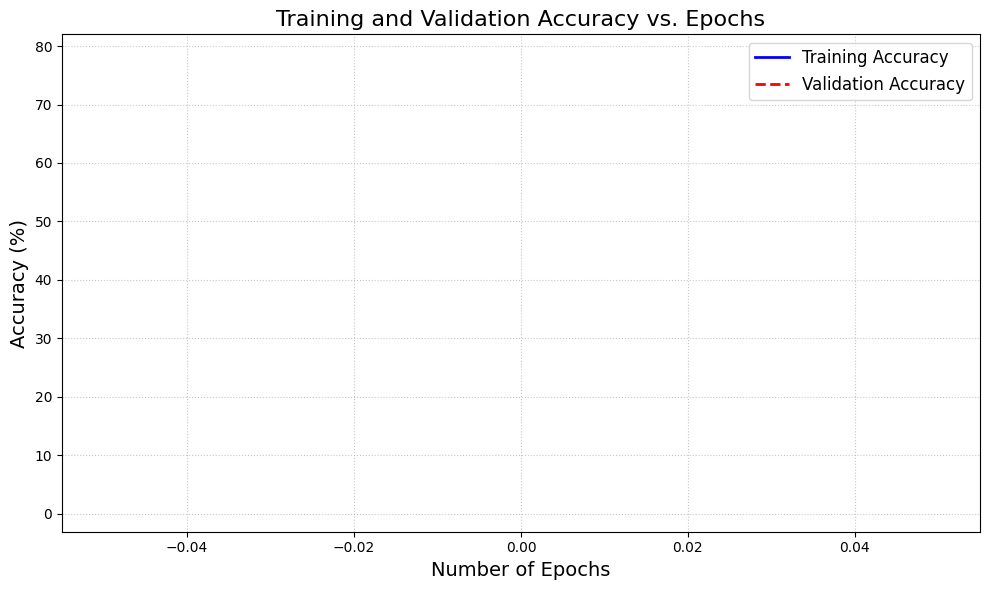

Total epochs parsed: 1
Last Training Accuracy: 0.00%
Last Logged Validation Accuracy: 25.10%


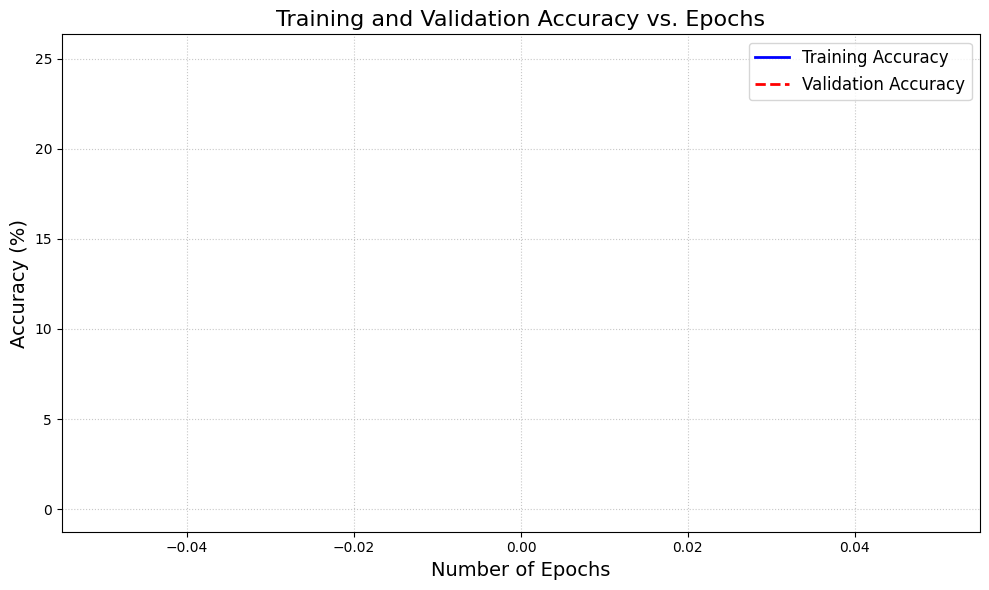

Total duration calculated from 1 epochs.
Total Duration in Seconds: 108.88s
Total Duration: 0h 1m 48.88s
  adding: content/OUTPUT/ (stored 0%)
  adding: content/OUTPUT/imagenet/ (stored 0%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/ (stored 0%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/config.yaml (deflated 60%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/events.out.tfevents.1765520609.063316f9ec14 (deflated 39%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/final_state.pth (deflated 7%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/checkpoint.pth (deflated 8%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/cls_cvt.py (deflated 77%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/train_0_rank0.txt (deflated 87%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/model_best.pth (deflated 7%)
Successfully zipped /content/OUTPUT to VIT_OUTPUT_archive.zip
Starting download of VIT_OUTPUT_archive.zip...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#-----------------------------------------------------------------------------
#(6) Model Training : Image Classification using ViT Model
#-----------------------------------------------------------------------------

print("Current directory:", os.getcwd())
os.chdir('/content')
print("Current directory:", os.getcwd())
# Fix the import error and syntax warning in cls_cvt.py
!sed -i "s/from torch._six import container_abcs/import collections.abc as container_abcs/g" CvT/lib/models/cls_cvt.py
!sed -i "s/pretrained_layers[0] is '*'/pretrained_layers[0] == '*'/g" CvT/lib/models/cls_cvt.py

# Re-run the training script
import os
import torch
import timm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 1. Define configuration file and training script paths
CONFIG_FILE = 'CvT/experiments/imagenet/vit/vt-13-224x224.yaml'
TRAIN_SCRIPT = 'CvT/tools/train.py'
output_folder = "/content/OUTPUT"
zip_file_name = "VIT_OUTPUT_archive.zip"
LOG_FILE_PATH = 'OUTPUT/imagenet/vt-13-224x224/train_0_rank0.txt'


# 2. Execute the training script for a single GPU
!python {TRAIN_SCRIPT} \
    --cfg {CONFIG_FILE} \
    --local_rank 0

# 3. Logging and Plotting
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN5, VAL_ACC_PATTERN5)
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN1, VAL_ACC_PATTERN1)
log_duration_for_trainig(LOG_FILE_PATH)

#4. Download the output folder
download_output(zip_file_name, output_folder)


Current directory: /content
Current directory: /content
/content/CvT/tools/../lib/models/cls_cvt.py:557: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  or pretrained_layers[0] is '*'
/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
=> merge config from CvT/experiments/imagenet/cvt/cvt-13-224x224.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenet/cvt-13-224x224 ...
=> setup logger ...
2025-12-10 21:19:43,556:[P:44729]:Rank[0/1] => collecting env info (might take some time)
2025-12-10 21:19:45,622:[P:44729]:Rank[0/1] 
PyTorch version: 2.9.0+cu126
Is debug build: False
CUDA used to build PyTorch: 12.6
ROCM used to build PyTorch: N/A

OS: Ubuntu 22.04.4 LTS (x86_64)
GCC version: (Ubuntu 11.4.0-1ubuntu1~22.04.2) 11.4.0
Clang version: Could not collec

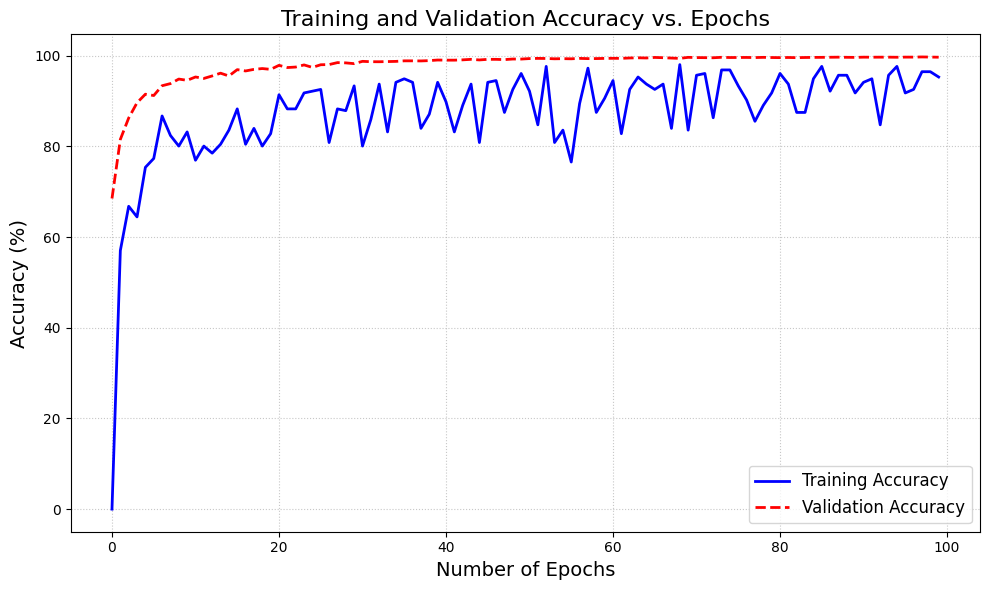

Total epochs parsed: 100
Last Training Accuracy: 64.84%
Last Logged Validation Accuracy: 90.45%


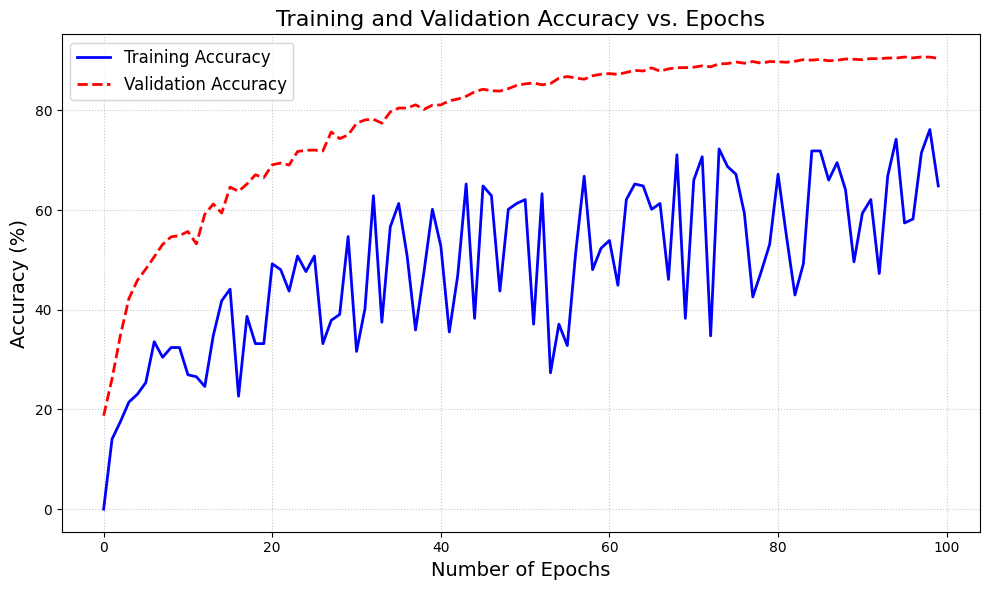

Total duration calculated from 100 epochs.
Total Duration in Seconds: 6157.74s
Total Duration: 1h 42m 37.74s
  adding: content/OUTPUT/ (stored 0%)
  adding: content/OUTPUT/imagenet/ (stored 0%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/ (stored 0%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/final_state.pth (deflated 7%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/checkpoint.pth (deflated 8%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/model_best.pth (deflated 7%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/events.out.tfevents.1765392205.b16de447aaad (deflated 66%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/config.yaml (deflated 60%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/train_0_rank0.txt (deflated 87%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/cls_cvt.py (deflated 77%)
  adding: content/OUTPUT/imagenet/cvt-13-224x224/ (stored 0%)
  adding: content/OUTPUT/imagenet/cvt-13-224x224/final_state.pth (deflated 7%)
  adding: content/OUTPUT/imagenet/c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#-----------------------------------------------------------------------------
#(7) Model Training : Image Classification using CvT Model
#-----------------------------------------------------------------------------

print("Current directory:", os.getcwd())
os.chdir('/content')
print("Current directory:", os.getcwd())
# Fix the import error and syntax warning in cls_cvt.py
!sed -i "s/from torch._six import container_abcs/import collections.abc as container_abcs/g" CvT/lib/models/cls_cvt.py
!sed -i "s/pretrained_layers[0] is '*'/pretrained_layers[0] ==Thanks  '*'/g" CvT/lib/models/cls_cvt.py

# Re-run the training script
import os
import torch
import timm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 1. Define configuration file and training script paths
CONFIG_FILE = 'CvT/experiments/imagenet/cvt/cvt-13-224x224.yaml'
TRAIN_SCRIPT = 'CvT/tools/train.py'
LOG_FILE_PATH = 'OUTPUT/imagenet/cvt-13-224x224/train_0_rank0.txt'
output_folder = "/content/OUTPUT"
zip_file_name = "CvT_OUTPUT_archive.zip"

# 2. Execute the training script for a single GPU
!python {TRAIN_SCRIPT} \
    --cfg {CONFIG_FILE} \
    --local_rank 0

# 3. Logging and Plotting
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN5, VAL_ACC_PATTERN5)
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN1, VAL_ACC_PATTERN1)
log_duration_for_trainig(LOG_FILE_PATH)

#4. Download the output folder
download_output(zip_file_name, output_folder)


Current directory: /content
/content/CvT/tools/../lib/models/cls_cvt.py:557: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  or pretrained_layers[0] is '*'
/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
=> merge config from CvT/experiments/imagenet/cnn/vanilla_cnn_224x224.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenet/vanilla_cnn_224x224 ...
=> setup logger ...
2025-12-10 23:04:51,821:[P:74095]:Rank[0/1] => collecting env info (might take some time)
2025-12-10 23:04:53,732:[P:74095]:Rank[0/1] 
PyTorch version: 2.9.0+cu126
Is debug build: False
CUDA used to build PyTorch: 12.6
ROCM used to build PyTorch: N/A

OS: Ubuntu 22.04.4 LTS (x86_64)
GCC version: (Ubuntu 11.4.0-1ubuntu1~22.04.2) 11.4.0
Clang version: Could not collect
CMake version: v

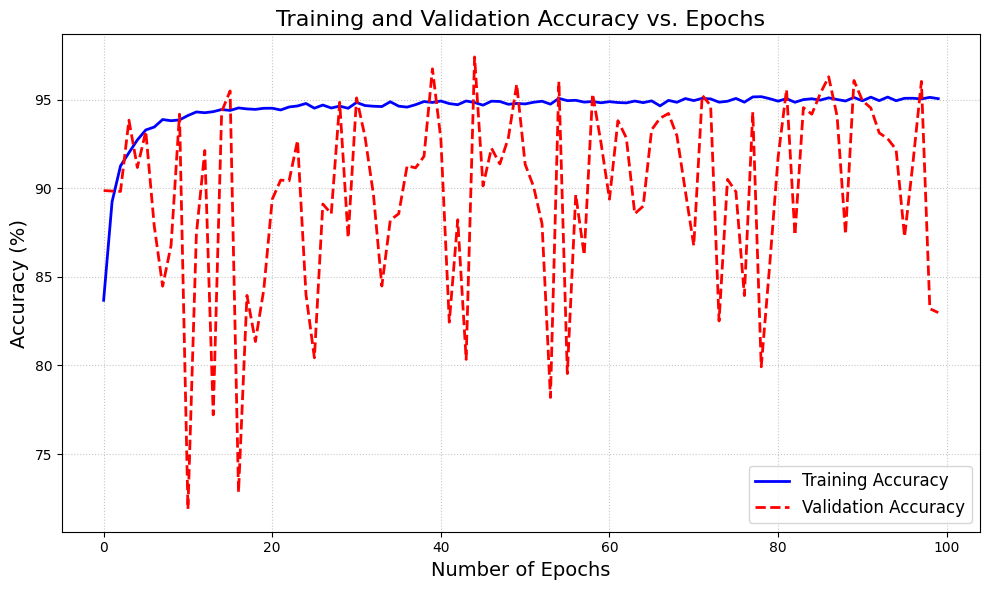

Total epochs parsed: 100
Last Training Accuracy: 61.42%
Last Logged Validation Accuracy: 33.50%


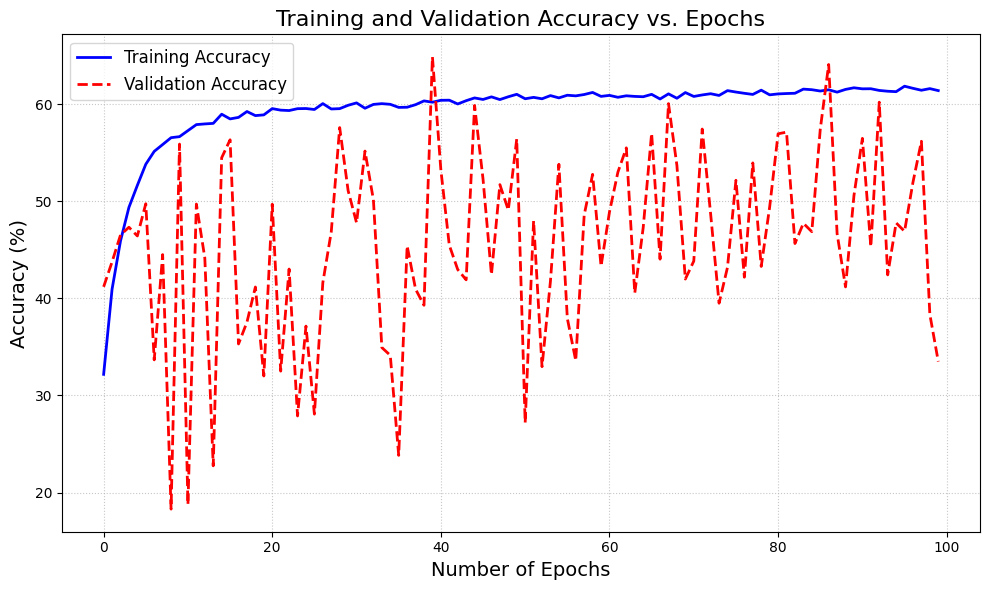

Total duration calculated from 100 epochs.
Total Duration in Seconds: 3612.10s
Total Duration: 1h 0m 12.10s
  adding: content/OUTPUT/ (stored 0%)
  adding: content/OUTPUT/imagenet/ (stored 0%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/ (stored 0%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/final_state.pth (deflated 7%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/checkpoint.pth (deflated 8%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/model_best.pth (deflated 7%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/events.out.tfevents.1765392205.b16de447aaad (deflated 66%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/config.yaml (deflated 60%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/train_0_rank0.txt (deflated 87%)
  adding: content/OUTPUT/imagenet/vt-13-224x224/cls_cvt.py (deflated 77%)
  adding: content/OUTPUT/imagenet/vanilla_cnn_224x224/ (stored 0%)
  adding: content/OUTPUT/imagenet/vanilla_cnn_224x224/vanilla_cnn.py (deflated 65%)
  adding: content/OUTPUT/i

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#-----------------------------------------------------------------------------
#(8) Model Training : Image Classification using CNN Model
#-----------------------------------------------------------------------------

os.chdir('/content')
print("Current directory:", os.getcwd())

# Fix the import error and syntax warning in cls_cvt.py
!sed -i "s/from torch._six import container_abcs/import collections.abc as container_abcs/g" CvT/lib/models/cls_cvt.py
!sed -i "s/pretrained_layers[0] is '*'/pretrained_layers[0] == '*'/g" CvT/lib/models/vanilla_cnn.py

# Re-run the training script
import os
import torch
import timm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 1. Define configuration file and training script paths
CONFIG_FILE = 'CvT/experiments/imagenet/cnn/vanilla_cnn_224x224.yaml'
TRAIN_SCRIPT = 'CvT/tools/train.py'
LOG_FILE_PATH = 'OUTPUT/imagenet/vanilla_cnn_224x224/train_0_rank0.txt'
output_folder = "/content/OUTPUT"
zip_file_name = "CNN_OUTPUT_archive.zip"

# 2. Execute the training script for a single GPU
!python {TRAIN_SCRIPT} \
    --cfg {CONFIG_FILE} \
    --local_rank 0

# 3. Logging and Plotting
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN5, VAL_ACC_PATTERN5)
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN1, VAL_ACC_PATTERN1)
log_duration_for_trainig(LOG_FILE_PATH)

#4. Download the output folder
download_output(zip_file_name, output_folder)

In [ ]:
#-----------------------------------------------------------------------------
#(9) Model Verification : Image Classification using CvT Model
#-----------------------------------------------------------------------------

print("Current directory:", os.getcwd())
os.chdir('/content')
print("Current directory:", os.getcwd())
# Fix the import error and syntax warning in cls_cvt.py
!sed -i "s/from torch._six import container_abcs/import collections.abc as container_abcs/g" CvT/lib/models/cls_cvt.py
!sed -i "s/pretrained_layers[0] is '*'/pretrained_layers[0] == '*'/g" CvT/lib/models/cls_cvt.py

# Re-run the training script
import torch
import timm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 1. Define configuration file and training script paths
CONFIG_FILE = 'CvT/experiments/imagenet/cvt/cvt-13-224x224.yaml'
TEST_SCRIPT = 'CvT/tools/test.py'
LOG_FILE_PATH = 'OUTPUT/imagenet/cvt-13-224x224/test_0_rank0.txt'


# 2. Execute the training script for a single GPU
!python CvT/tools/test.py \
    --cfg CvT/experiments/imagenet/cvt/cvt-13-224x224.yaml \
    --local_rank 0 \
    TEST.MODEL_FILE /content/OUTPUT/imagenet/cvt-13-224x224/model_best.pth

# 3. Logging and Plotting
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN5, VAL_ACC_PATTERN5)
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN1, VAL_ACC_PATTERN1)
log_duration_for_trainig(LOG_FILE_PATH)

Current directory: /content
Current directory: /content
/content/CvT/tools/../lib/models/cls_cvt.py:557: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  or pretrained_layers[0] is '*'
/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
=> merge config from CvT/experiments/imagenet/cvt/cvt-13-224x224.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenet/cvt-13-224x224 ...
=> setup logger ...
2025-12-11 00:26:02,677:[P:98734]:Rank[0/1] => collecting env info (might take some time)
2025-12-11 00:26:04,542:[P:98734]:Rank[0/1] 
PyTorch version: 2.9.0+cu126
Is debug build: False
CUDA used to build PyTorch: 12.6
ROCM used to build PyTorch: N/A

OS: Ubuntu 22.04.4 LTS (x86_64)
GCC version: (Ubuntu 11.4.0-1ubuntu1~22.04.2) 11.4.0
Clang version: Could not collec

In [ ]:
!unzip OUTPUT.zip

Archive:  OUTPUT.zip
   creating: OUTPUT/
   creating: OUTPUT/imagenet/
   creating: OUTPUT/imagenet/cvt-13-224x224/
  inflating: OUTPUT/imagenet/cvt-13-224x224/train_0_rank0.txt  
   creating: OUTPUT/imagenet/vanilla_cnn_224x224/
  inflating: OUTPUT/imagenet/vanilla_cnn_224x224/test_0_rank0.txt  
   creating: OUTPUT/imagenet/vt-13-224x224/
  inflating: OUTPUT/imagenet/vt-13-224x224/train_0_rank0.txt  


Current directory: /content
CvT PLOTS------------------
Total epochs parsed: 60
Last Training Accuracy: 66.41%
Last Logged Validation Accuracy: 85.99%


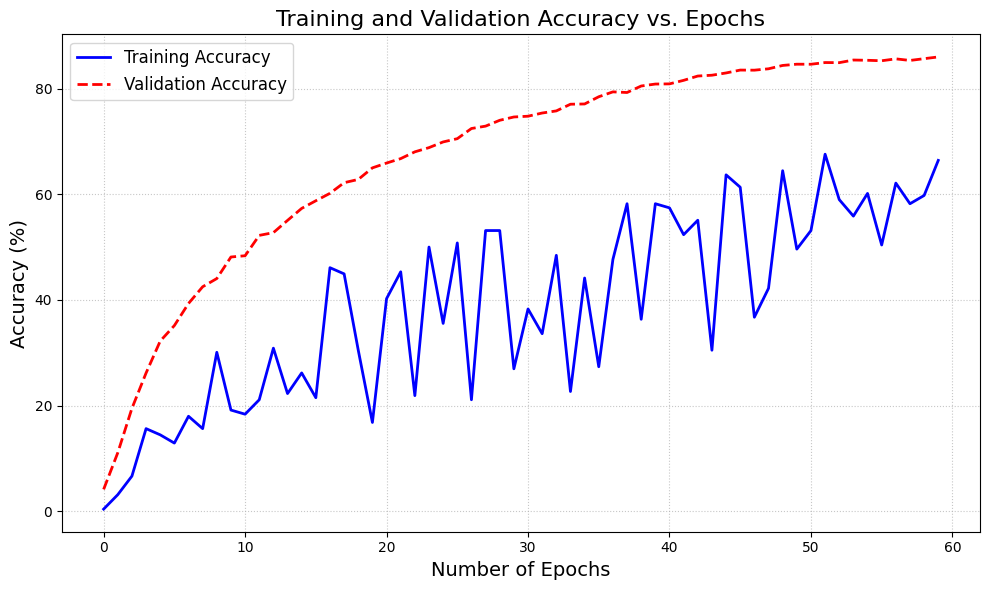

Total epochs parsed: 60
Last Training Accuracy: 37.11%
Last Logged Validation Accuracy: 63.16%


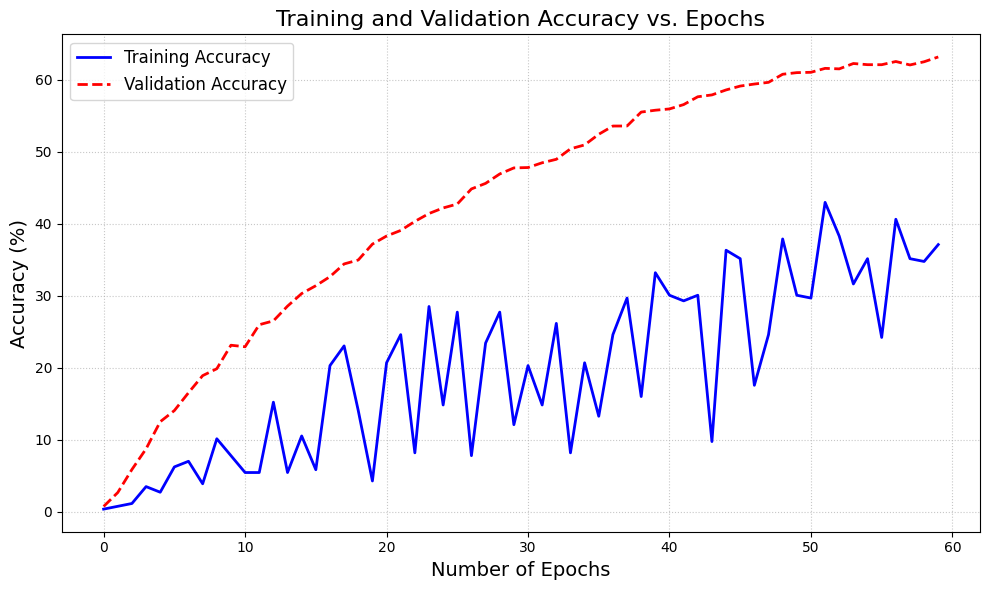

Total duration calculated from 60 epochs.
Total Duration in Seconds: 12380.14s
Total Duration: 3h 26m 20.14s
ViT PLOTS------------------
Total epochs parsed: 60
Last Training Accuracy: 39.45%
Last Logged Validation Accuracy: 86.78%


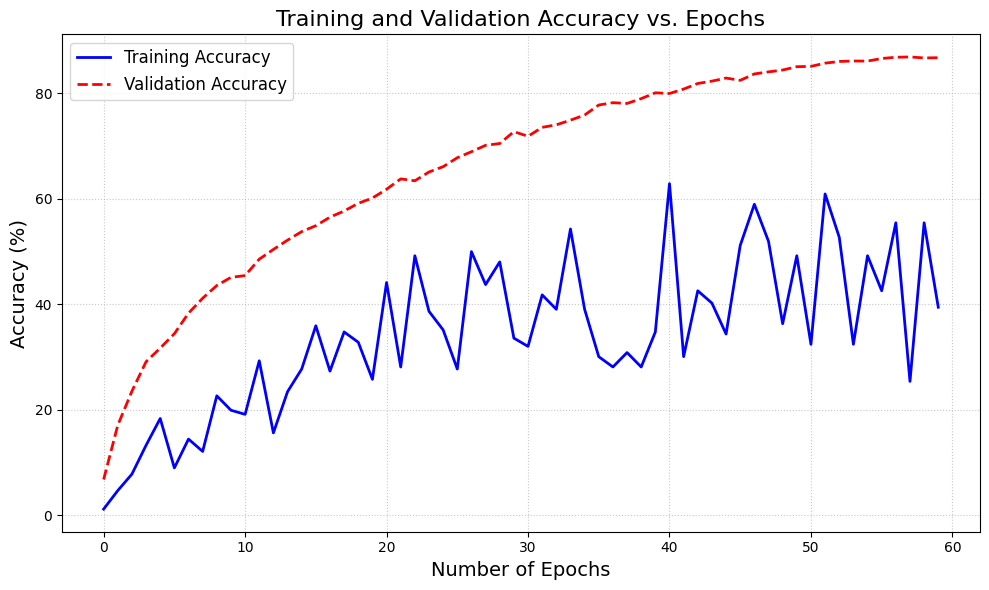

Total epochs parsed: 60
Last Training Accuracy: 16.80%
Last Logged Validation Accuracy: 64.51%


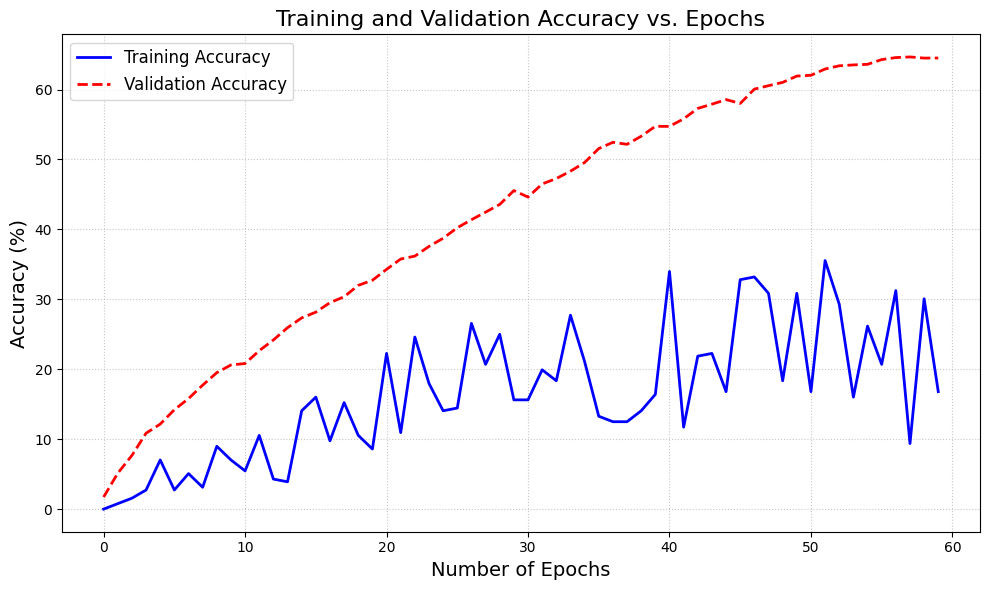

Total duration calculated from 60 epochs.
Total Duration in Seconds: 22205.93s
Total Duration: 6h 10m 5.93s
CNN PLOTS------------------
Total epochs parsed: 60
Last Training Accuracy: 41.33%
Last Logged Validation Accuracy: 26.06%


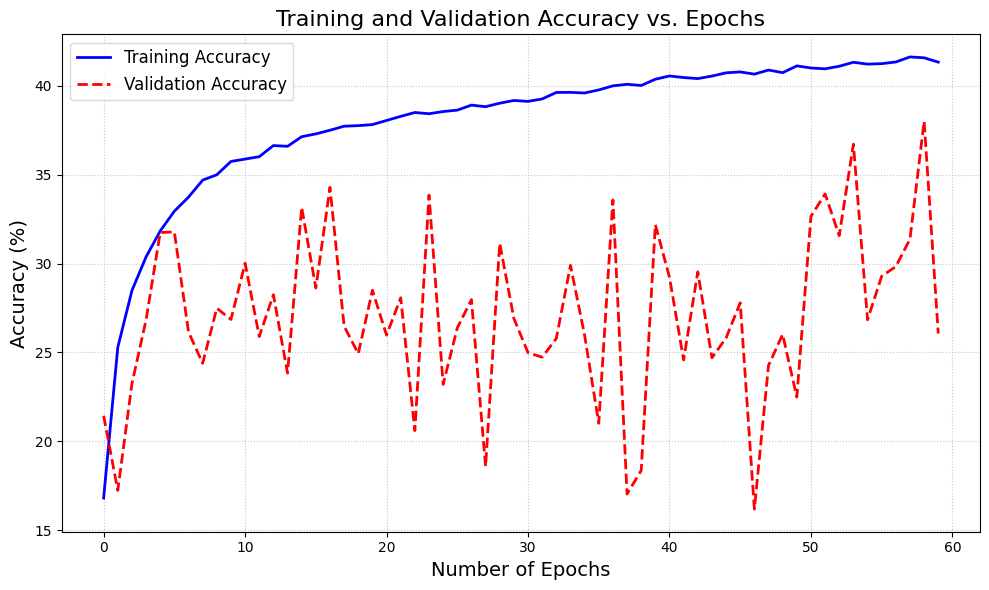

Total epochs parsed: 60
Last Training Accuracy: 18.09%
Last Logged Validation Accuracy: 10.24%


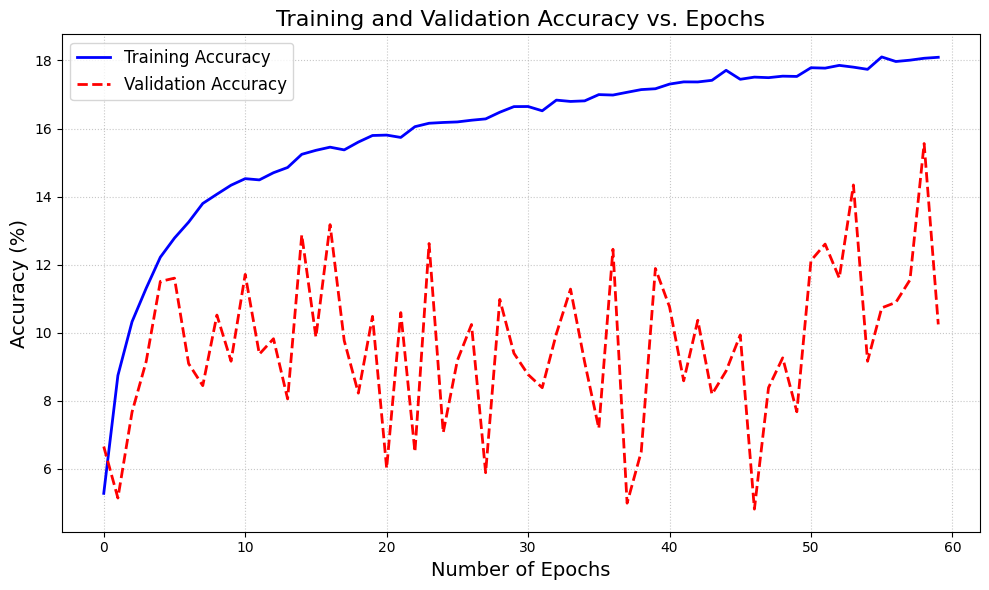

Total duration calculated from 60 epochs.
Total Duration in Seconds: 7782.27s
Total Duration: 2h 9m 42.27s


In [ ]:
#-----------------------------------------------------------------------------
#(9) Plot imagenet-1k Results for CvT, ViT and CNN
#-----------------------------------------------------------------------------
import os
import torch
import timm
os.chdir('/content')
print("Current directory:", os.getcwd())


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Plotting for CvT
# 1. Define configuration file and training script paths
LOG_FILE_PATH = 'OUTPUT/imagenet/cvt-13-224x224/train_0_rank0.txt'
output_folder = "/content/OUTPUT"


# 2. Logging and Plotting
print(f"CvT PLOTS------------------")
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN5, VAL_ACC_PATTERN5)
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN1, VAL_ACC_PATTERN1)
log_duration_for_trainig(LOG_FILE_PATH)

# Plotting for ViT
LOG_FILE_PATH = 'OUTPUT/imagenet/vt-13-224x224/train_0_rank0.txt'
output_folder = "/content/OUTPUT"


# 2. Logging and Plotting
print(f"ViT PLOTS------------------")
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN5, VAL_ACC_PATTERN5)
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN1, VAL_ACC_PATTERN1)
log_duration_for_trainig(LOG_FILE_PATH)


# Plotting for CNN
LOG_FILE_PATH = 'OUTPUT/imagenet/vanilla_cnn_224x224/train_0_rank0.txt'
output_folder = "/content/OUTPUT"


# 2. Logging and Plotting
print(f"CNN PLOTS------------------")
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN5, VAL_ACC_PATTERN5)
plot_accuracies_graph(LOG_FILE_PATH, TRAIN_ACC_PATTERN1, VAL_ACC_PATTERN1)
log_duration_for_trainig(LOG_FILE_PATH)